# Pari Pandey
# ITP 259 Fall 2023
# Final Project
# Problem 2

Final Project Problem 2
1.	You are given a starter python notebook here
2.	Open it in Google colab.
3.	The notebook does not run as provided to you.
4.	There is missing code.
5.	Your goal is to complete the notebook such that, when run correctly, it classifies the test images as horse or human.
6.	It should also generate 25 visualizations along with the titles as shown below.
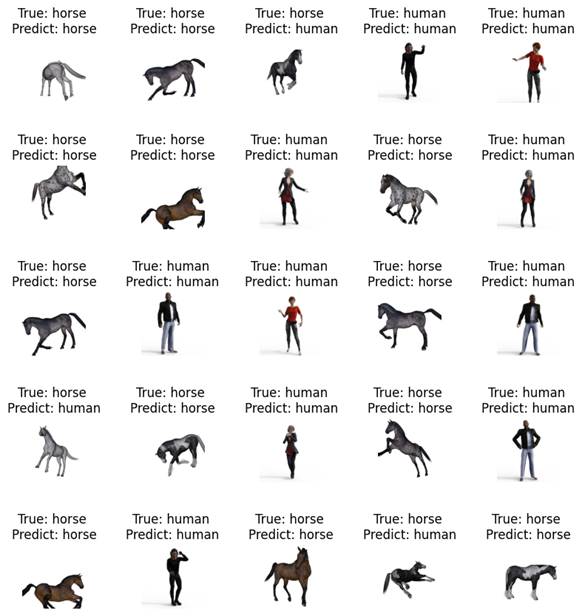

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam
import tensorflow_datasets as tfds

In [13]:
(ds_train, ds_test),  ds_info = tfds.load('horses_or_humans',
                                          split=['train', 'test'],
                                          with_info = True, batch_size=-1,
                                          as_supervised=True)

X_train, y_train = tfds.as_numpy(ds_train)
X_test, y_test = tfds.as_numpy(ds_test)

X_train = X_train / 255.
X_test = X_test / 255.

class_names = ['horse', 'human']

In [14]:
model = tf.keras.models.Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    MaxPooling2D(pool_size = (2,2), padding = 'same'),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D( pool_size = (2,2), padding = 'same'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D( pool_size = (2,2), padding = 'same'),
    Flatten(),
    Dense(  128 , activation='relu'),
    Dense(  2  , activation='softmax')
])

In [15]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
33/33 [==============================] - 4s 51ms/step - loss: 0.9367 - accuracy: 0.7799
Epoch 2/5
33/33 [==============================] - 2s 48ms/step - loss: 0.0654 - accuracy: 0.9718
Epoch 3/5
33/33 [==============================] - 2s 48ms/step - loss: 0.0256 - accuracy: 0.9912
Epoch 4/5
33/33 [==============================] - 2s 48ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 5/5
33/33 [==============================] - 2s 52ms/step - loss: 3.2034e-04 - accuracy: 1.0000


In [16]:
y_pred = np.round(model.predict(X_test))

print('Model accuracy on test data is: ', model.evaluate(X_test, y_test)[1])

8/8 [==============================] - 0s 27ms/step - loss: 2.9495 - accuracy: 0.7695
Model accuracy on test data is:  0.76953125


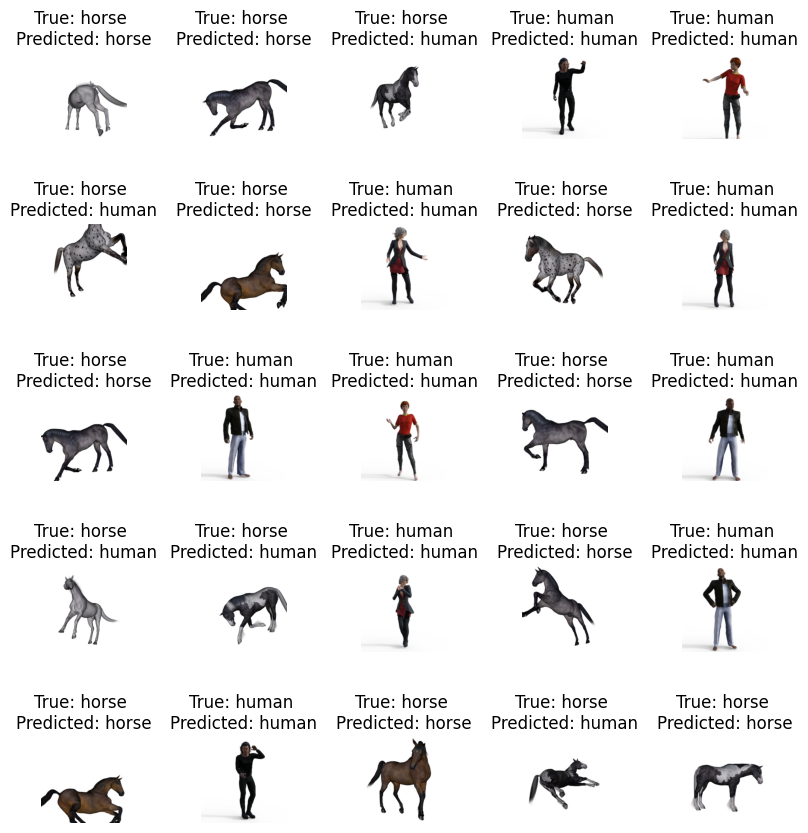

In [17]:
# Plot the Actual vs. Predicted results
plt.figure(figsize=[10,10])
for i in range (25):
  plt.subplot(5, 5, i+1).imshow(X_test[i])
  plt.subplot(5, 5, i+1).set_title("True: %s \nPredicted: %s" %
                      (class_names[y_test[i]], class_names[np.argmax(y_pred[i], axis = 0)]))
  plt.subplot(5, 5, i+1).axis('off')

plt.subplots_adjust(hspace=1)